In [14]:
#패키지 로드 및 정리를 위한 폴더 생성
import os
import time
import numpy as np
import pandas as pd
from datetime import datetime

if not any([s=='result' for s in os.listdir('.')]):
    os.mkdir('result')
if not any([s=='image' for s in os.listdir('.')]):
    os.mkdir('image')

In [19]:
#함수에 입력하는 'code'변수의 예시입니다: OIL_CL = WTI(서부 텍사스 유), OIL_DU = 두바이유, OIL_LO = 경유

def get_oil_price(code):
    
    delay = 0.01
    page = 1
    result = []
    start_time = datetime.now()
    
    print('[{}] 데이터 수집 시작. (code: {})'.format(start_time.strftime('%Y/%m/%d %H:%M:%S'), code))
    while(True):
        url = 'https://finance.naver.com/marketindex/worldDailyQuote.nhn?marketindexCd={}&fdtc=2&page={}'.format(code, page)
        data = pd.read_html(url)[0].dropna()
        if page !=1:
            try:
                if data.iloc[-1,0] == result[-1].iloc[-1,0]:
                    break
            except:
                break
        result.append(data)
        page += 1
        time.sleep(delay)
    
    oil_price = pd.concat(result).reset_index(drop=True) #결과물을 데이터 프레임 형식으로 변환합니다
    oil_price.columns = ['날짜', '종가', '전일대비', '등락율']
    oil_price['날짜'] = oil_price['날짜'].apply(lambda x: datetime.strptime(x, '%Y.%m.%d'))
    oil_price = oil_price[['날짜', '종가']]
    oil_price.insert(0, '코드', code) #유가 종류에 대한 컬럼 생성
    
    end_time = datetime.now()
    print('[{}] 데이터 수집 종료. (code: {}, 수집시간: {}초, 데이터수: {:,}개)'.format(end_time.strftime('%Y/%m/%d %H:%M:%S'), code, (end_time-start_time).seconds, len(oil_price)))
    return oil_price

In [23]:
oil_price_du = get_oil_price('OIL_DU')
oil_price_wti = get_oil_price('OIL_CL')
oil_price_brent = get_oil_price('OIL_BRT')

[2020/05/16 10:51:35] 데이터 수집을 시작합니다. (code: OIL_DU)
[2020/05/16 10:52:17] 데이터 수집을 종료합니다. (code: OIL_DU, 수집시간: 41초, 데이터수: 3,489개)
[2020/05/16 10:52:17] 데이터 수집을 시작합니다. (code: OIL_CL)
[2020/05/16 10:52:58] 데이터 수집을 종료합니다. (code: OIL_CL, 수집시간: 40초, 데이터수: 3,333개)
[2020/05/16 10:52:58] 데이터 수집을 시작합니다. (code: OIL_BRT)
[2020/05/16 10:53:37] 데이터 수집을 종료합니다. (code: OIL_BRT, 수집시간: 39초, 데이터수: 3,371개)


In [22]:
oil_price_du

,코드,날짜,종가
0,OIL_DU,2020-05-15,29.80
1,OIL_DU,2020-05-14,29.20
2,OIL_DU,2020-05-13,26.68
3,OIL_DU,2020-05-12,26.81
4,OIL_DU,2020-05-11,27.27
...,...,...,...
3484,OIL_DU,2006-04-24,64.01
3485,OIL_DU,2006-04-21,63.70
3486,OIL_DU,2006-04-20,64.40
3487,OIL_DU,2006-04-19,65.10


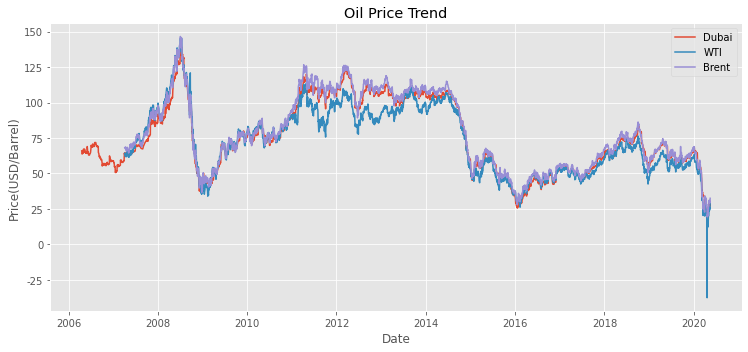

In [28]:
#시각화단계

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10.5, 5))
plt.plot(oil_price_du['날짜'], oil_price_du['종가'], label='Dubai')
plt.plot(oil_price_wti['날짜'], oil_price_wti['종가'], label='WTI')
plt.plot(oil_price_brent['날짜'], oil_price_brent['종가'], label='Brent')

plt.title('Oil Price Trend')
plt.xlabel('Date')
plt.ylabel('Price(USD/Barrel)')
plt.legend()
plt.tight_layout()
plt.savefig('image/Oil Price Trend.jpg') #이미지 폴더내 파일 생성
plt.show()